# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Wrangling and Cleaning Time-Series Data
#### 3. Time Series Analysis: Decomposition
#### 4. Testing For Stationarity
#### 5. Bonus Task
    Defining the Parameters
    Splitting the Data
    Running and Fitting the Model
    Iterating

# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
#Creating a folderpath shortcut for importing/exporting data easier

path = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'bank_cleaned_2.pkl'))

In [5]:
df.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month/year,...,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit
0,56,housemaid,married,spain,basic.4y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,estonia,high.school,unknown,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.133,5191.0,no
2,37,services,married,austria,high.school,no,yes,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,lithuania,basic.6y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.132,5191.0,no
4,56,services,married,slovakia,high.school,no,no,yes,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,3.579,5191.0,no


# Wrangling and Cleaning Time-Series Data

In [6]:
#Aggregating the Euribor 3 Months Rate to product the average grouped by the month/year column

df_plot = df.groupby('month/year')['euribor_3_mths'].mean()

In [7]:
#Convert the series into a dataframe

df_plot = pd.DataFrame(df_plot)

In [8]:
#Check if conversion was done

df_plot.head()

,euribor_3_mths
month/year,
2018-05,4.462353
2018-06,4.535542
2018-07,4.519959
2018-08,4.546242
2018-10,4.622030


In [9]:
#Reset the index so that month/year can become a column

df_plot = df_plot.reset_index()

In [10]:
#Renaming the columns for better representation

df_plot.rename(columns = {'euribor_3_mths' : 'average_euribor', 'month/year' : 'date'}, inplace = True)

In [11]:
#Check that the columns were renamed succesfully

df_plot

,date,average_euribor
0,2018-05,4.462353
1,2018-06,4.535542
2,2018-07,4.519959
3,2018-08,4.546242
4,2018-10,4.622030
5,2018-11,3.897549
6,2018-12,3.493400
7,2019-03,1.925511
8,2019-04,1.747081
9,2019-05,1.629581


In [12]:
# Set the "Date" column as the index - just to show this part (this was probably not necessary though)

from datetime import datetime

df_plot['Date'] = pd.to_datetime(df_plot['date']) # Create a new Date column from "date.""
df_plot = df_plot.set_index('Date') # Set the Date as the index of the dataframe.
df_plot.drop(['date'], axis=1, inplace=True) # Drop the old "date" column.
df_plot.head()

,average_euribor
Date,
2018-05-01,4.462353
2018-06-01,4.535542
2018-07-01,4.519959
2018-08-01,4.546242
2018-10-01,4.622030


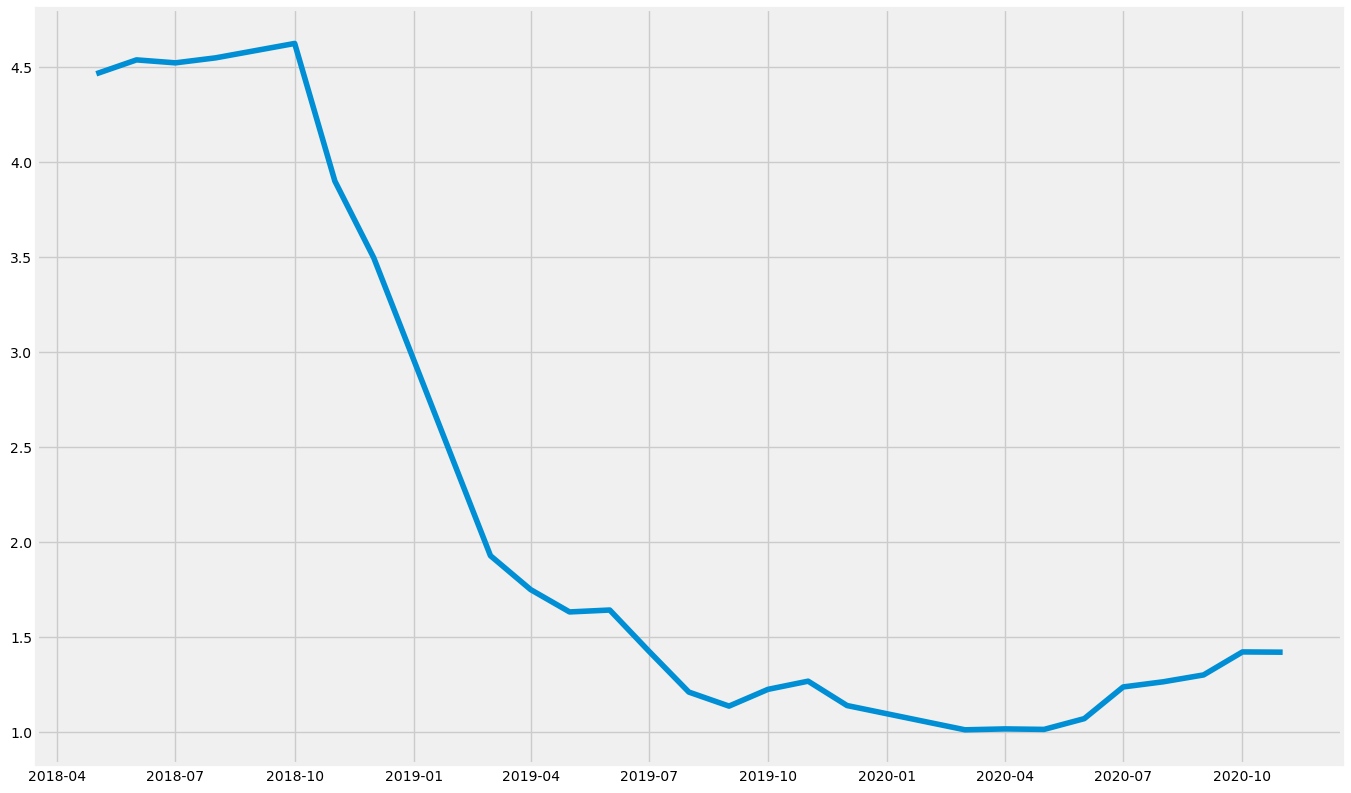

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,10), dpi=100)

plt.plot(df_plot)

I chose not to create a subset for my data, since the time period is quite short from 05-2018 until 11-2020 and the data is quite relevant and contains no forecasted data aswell.

In [14]:
#Check if any missing data exists

df_plot.isnull().sum() 

average_euribor    0
dtype: int64

#### No missing data

In [15]:
# Check for duplicates

dups = df_plot.duplicated()
dups.sum()



0

#### No duplicates

# Time-Series Analysis: Decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_plot, model='additive',freq=12, extrapolate_trend = 12)

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

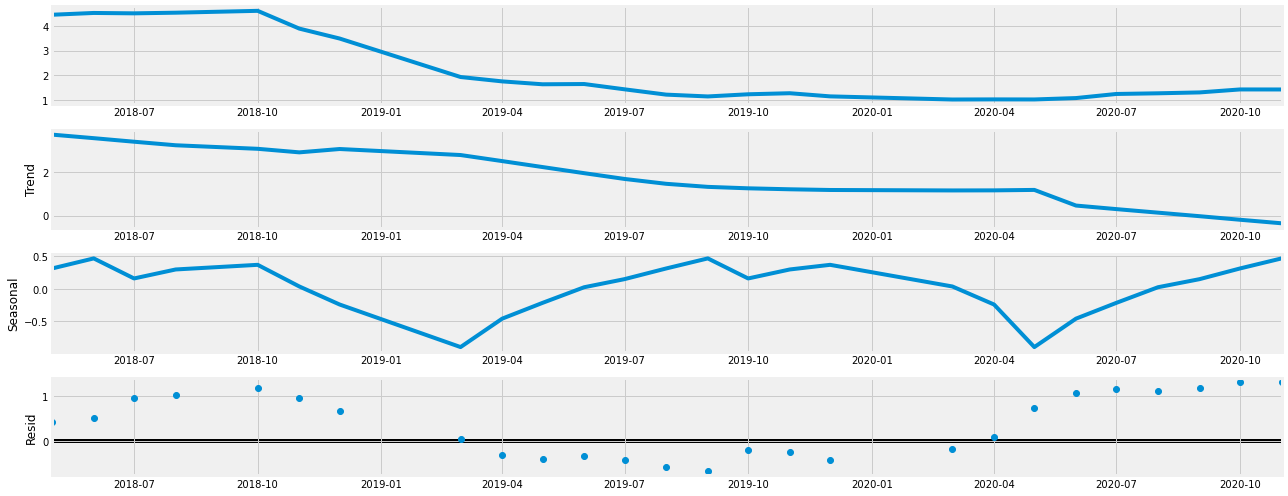

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

The level and trend show completely different picture. The level shows a significant drop from 2018-10 until 2019-03 before showing a gradual decline before leveling off around 2019-09. Where as the trend just shows a gradual decline until 2020-05 and then a noticible dip at this time, before continuing it's gradual decline. The gradual decline could be the result of the 2018 financial market crisis, which could had an effect on the bank's own interest rate.

For the seasonality, there is no common fluctuations to suggest the data is seasonal.

The residual shows some level of noises to suggest again which again could be the effect of the market crisis.

# Testing for stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_plot['average_euribor'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.502881
p-value                         0.000194
Number of Lags Used             4.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


The Dickey-Fuller test results show the test statistic at -4.50 and the p-value at 0.000194 so this shows that the test results are significant. When comparing the Test Statistic's value with the Critical Values (1%, 5% & 10%), the Test Statistic's value is smaller than all Critical Values, which means the null hypothesis can be rejected and the time series is stationary.

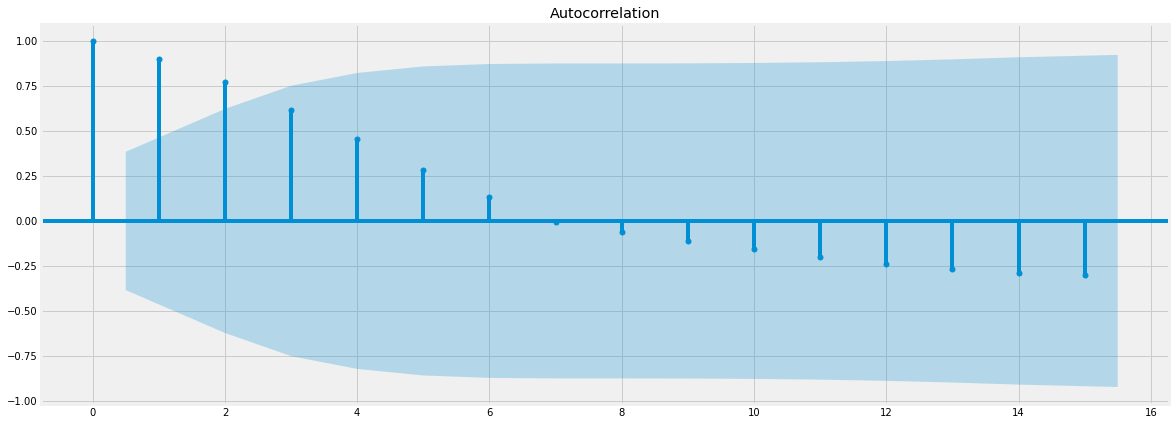

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_plot)
plt.show()

The autocorrelation graph shows only a 3 autocorrelated terms above the confidence interval. Although the time series data is not 100% stationary, there are less than 10 significant lags above the confidence interval so there is no reason to do a round of differencing.

# Bonus Task

### Defining The Parameters

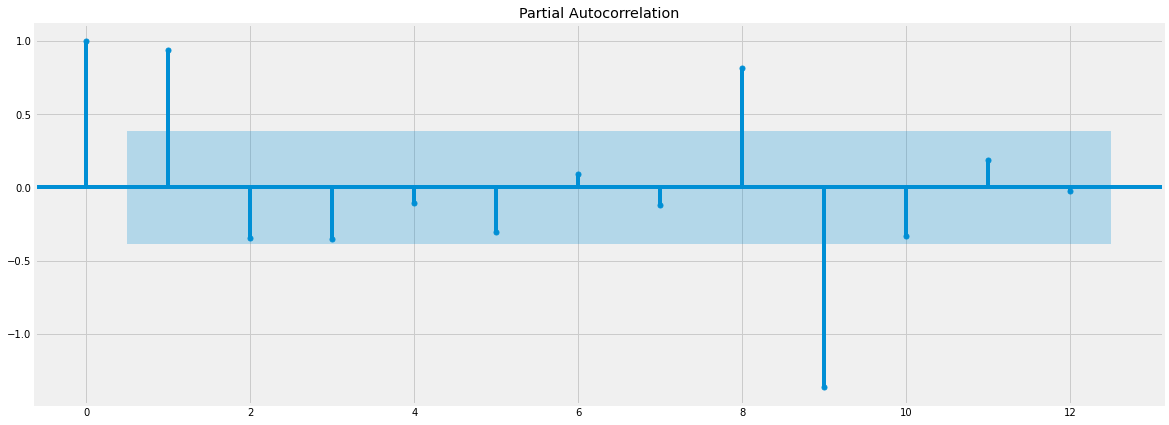

<Figure size 4500x4500 with 0 Axes>

In [21]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(df_plot, lags=12)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

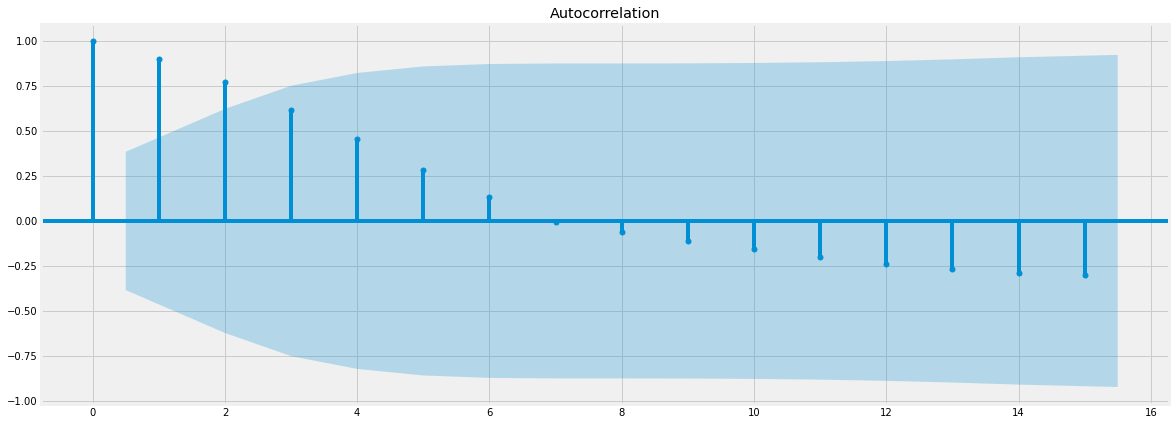

<Figure size 1500x500 with 0 Axes>

In [22]:
# Plot autocorrelations to determine parameter q

plot_acf(df_plot)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

**Looking at both the partial autocorrelation and autocorrelation plots, I think I will need 4 AR terms and 3 MA terms. Since the PACF graph will enable us to determine the p parameter (AR) and the ACF graph will enable us to determine the q parameter (MA). In the PACF graph there are 4 autocorrelations outside the confidence interval and in the ACF graph there are 3 autocorrelations outside the confidence levels.**

### Splitting the Data

In [23]:
# Split the data

train = df_plot['average_euribor'][:19]
test = df_plot['average_euribor'][18:]

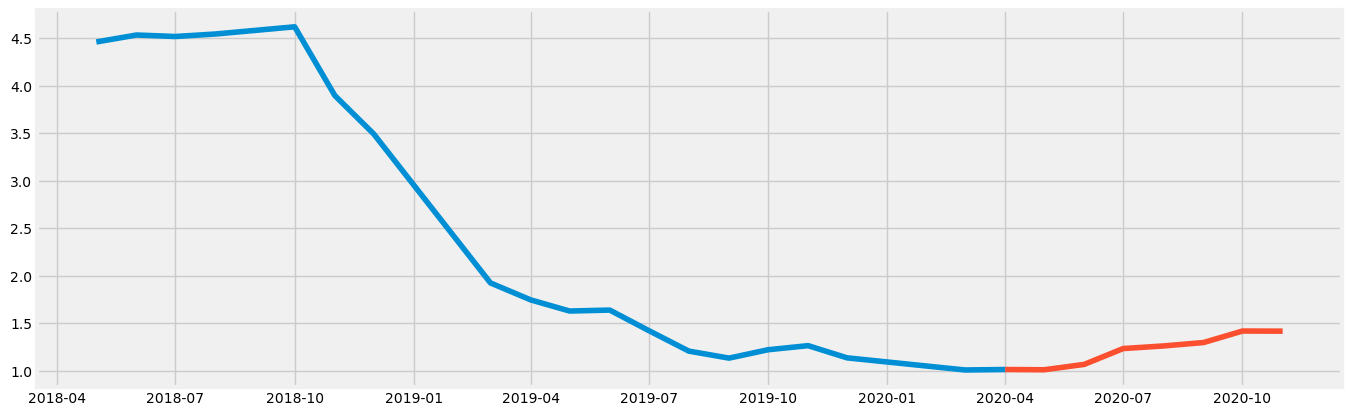

In [24]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [25]:
test.shape

(8,)

### Running and Fitting the Model

In [26]:
from statsmodels.tsa.api import ARMA # Import the model you need

                              ARMA Model Results                              
Dep. Variable:        average_euribor   No. Observations:                   19
Model:                     ARMA(4, 0)   Log Likelihood                  -9.192
Method:                       css-mle   S.D. of innovations              0.360
Date:                Wed, 25 Aug 2021   AIC                             30.385
Time:                        16:38:28   BIC                             36.051
Sample:                             0   HQIC                            31.344
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5268      0.961      2.630      0.009       0.644       4.410
ar.L1.average_euribor     1.2475      0.215      5.805      0.000       0.826       1.669
ar.L2.av

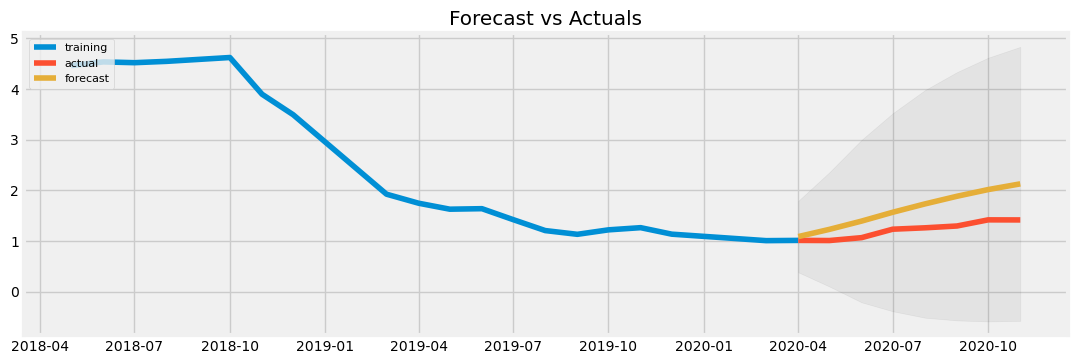

In [27]:
model = ARMA(train, order=(4, 0, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 8 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**The results shows only 1 AR term is statistically significant but the forecasted line is within the grey confidence interval. Even though this is still satisfactory, I will do an iteration to see if I can get better results**

### Iterating

                              ARMA Model Results                              
Dep. Variable:        average_euribor   No. Observations:                   19
Model:                     ARMA(2, 0)   Log Likelihood                 -10.644
Method:                       css-mle   S.D. of innovations              0.393
Date:                Wed, 25 Aug 2021   AIC                             29.288
Time:                        16:38:28   BIC                             33.066
Sample:                             0   HQIC                            29.927
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5817      1.136      2.272      0.023       0.354       4.809
ar.L1.average_euribor     1.3366      0.203      6.593      0.000       0.939       1.734
ar.L2.av

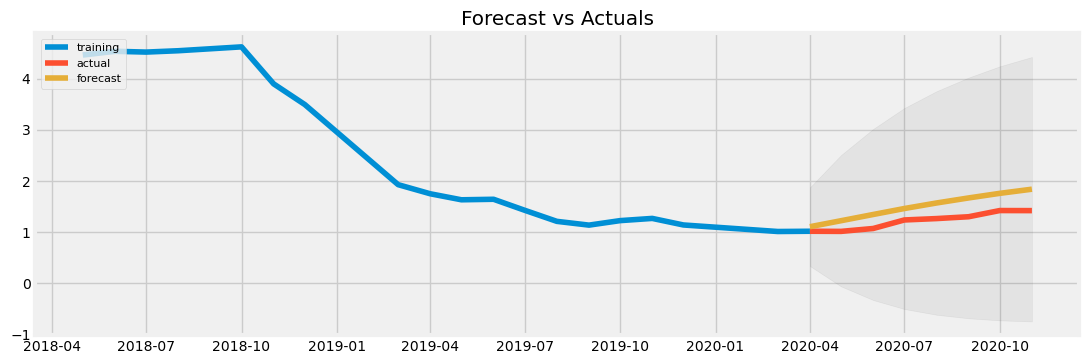

In [28]:
#iterating the model again with new AR/MA term values

model = ARMA(train, order=(2, 0, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 7 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Changing the p parameter value, again only 1 AR term is statistically significant and has significantly changed the forecasted line closer to the actual values line. So I would assume that using the value of 1 for p parameter will align the forecasted line with the actual values line. I will do another round of iteration, just to see.

                              ARMA Model Results                              
Dep. Variable:        average_euribor   No. Observations:                   19
Model:                     ARMA(1, 0)   Log Likelihood                 -12.173
Method:                       css-mle   S.D. of innovations              0.428
Date:                Wed, 25 Aug 2021   AIC                             30.345
Time:                        16:38:28   BIC                             33.178
Sample:                             0   HQIC                            30.825
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.6621      1.414      1.883      0.060      -0.109       5.434
ar.L1.average_euribor     0.9647      0.042     23.048      0.000       0.883       1.047
        

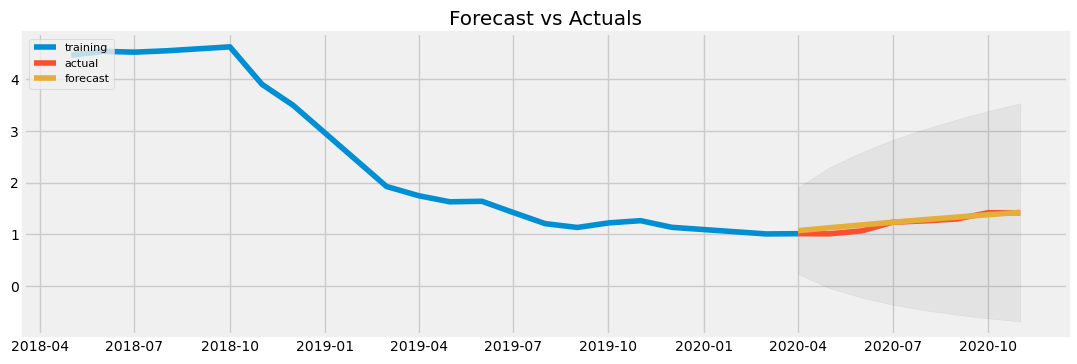

In [29]:
#Reiterating the model once more, with less AR terms

model = ARMA(train, order=(1, 0, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 7 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**As I assumed, the forecasted linek is almost in line with the actual values line.**